In [1]:
#pip install torch
# touch works with tensors - 4+ dimensional
# matrices
import pandas as pd
import torch

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()


/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_55449/4165573194.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32,
                                                    stratify=y)

In [3]:
import torch.nn as nn
import torch.nn.functional as F #functional has the activation functions

#create tensors from our data
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)

tensor([[  4.0000, 146.0000,  85.0000,  ...,  28.9000,   0.1890,  27.0000],
        [  5.0000,  96.0000,  74.0000,  ...,  33.6000,   0.9970,  43.0000],
        [  6.0000, 107.0000,  88.0000,  ...,  36.8000,   0.7270,  31.0000],
        ...,
        [ 17.0000, 163.0000,  72.0000,  ...,  40.9000,   0.8170,  47.0000],
        [  0.0000, 167.0000,   0.0000,  ...,  32.3000,   0.8390,  30.0000],
        [  2.0000, 134.0000,  70.0000,  ...,  28.9000,   0.5420,  23.0000]])


In [9]:
#artificial neural network
class ANN_Model(nn.Module):
    def __init__(self, input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__() #super is a computed indirected reference
        # what that means is that it isolates changes and makes 
        # sure the children in the layers of multiple inheritnce are calling
        # the right parents
        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        #apply activation function
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [10]:
torch.manual_seed(32)

#create an instance of the model
ann = ANN_Model()

In [11]:
# loss function
loss_function = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(ann.parameters(), lr=0.01)

In [12]:
#run model through various epochs/iterations
final_loss=[]
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')

    optimizer.zero_grad() #zeros the gradient before running backward propagation
    loss.backward() #minimize the loss function using backward propagation
    optimizer.step() #perform one optimization step each function

Epoch number: 1 with loss: 1.1397255659103394
Epoch number: 11 with loss: 0.8227586150169373
Epoch number: 21 with loss: 0.6071917414665222
Epoch number: 31 with loss: 0.5826363563537598
Epoch number: 41 with loss: 0.56843101978302
Epoch number: 51 with loss: 0.5513573884963989
Epoch number: 61 with loss: 0.5367758870124817
Epoch number: 71 with loss: 0.5266153812408447
Epoch number: 81 with loss: 0.5162999629974365
Epoch number: 91 with loss: 0.508420467376709
Epoch number: 101 with loss: 0.4999443590641022
Epoch number: 111 with loss: 0.49206793308258057
Epoch number: 121 with loss: 0.4785580337047577
Epoch number: 131 with loss: 0.4660762548446655
Epoch number: 141 with loss: 0.4569750130176544
Epoch number: 151 with loss: 0.44949615001678467
Epoch number: 161 with loss: 0.4408470094203949
Epoch number: 171 with loss: 0.4346626400947571
Epoch number: 181 with loss: 0.4436747133731842
Epoch number: 191 with loss: 0.42609235644340515
Epoch number: 201 with loss: 0.42238909006118774
Ep

In [13]:
# predictions
y_pred = []

with torch.no_grad(): #decreases memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) #returns index with the max
        # element in each position set

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

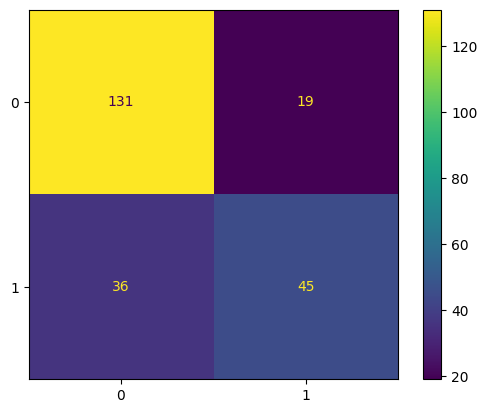

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)